In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [2]:
# Load MNIST dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
# Print shape of train and test sets
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


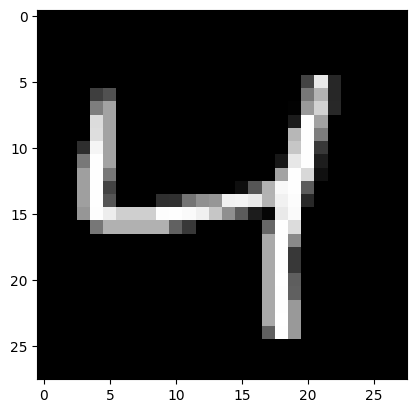

In [4]:
# Plot some images from train and test sets
plt.imshow(x_train[2,:,:],cmap='gray')
plt.show()

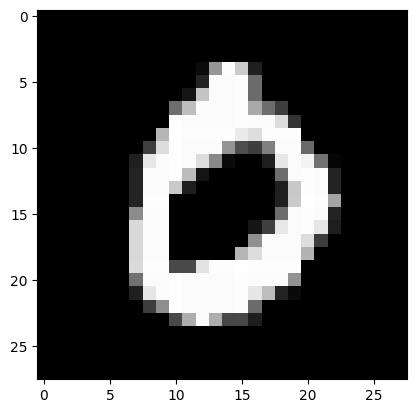

In [5]:
plt.imshow(x_test[3,:,:],cmap='gray')
plt.show()

In [6]:
# Print some labels from train set
print(y_train[2])

4


In [7]:
print(y_train[:50])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


In [8]:
# Create a data frame from labels and count their frequencies
L=pd.DataFrame(y_train)
print(L[0].value_counts())

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64


In [9]:
# Reshape input data to have four dimensions
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [10]:
# Normalize input data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [11]:
# Convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [13]:
# Create a sequential model
model = Sequential()

# Define model architecture using convolutional and pooling layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten output before passing it to final fully connected layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [14]:
# Compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
# Train model
model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1)

Epoch 1/10
235/235 [==============================] - 49s 202ms/step - loss: 0.4041 - accuracy: 0.8923
Epoch 2/10
235/235 [==============================] - 47s 201ms/step - loss: 0.0938 - accuracy: 0.9719
Epoch 3/10
235/235 [==============================] - 47s 201ms/step - loss: 0.0675 - accuracy: 0.9799
Epoch 4/10
235/235 [==============================] - 48s 203ms/step - loss: 0.0549 - accuracy: 0.9832
Epoch 5/10
235/235 [==============================] - 49s 207ms/step - loss: 0.0473 - accuracy: 0.9860
Epoch 6/10
235/235 [==============================] - 49s 207ms/step - loss: 0.0410 - accuracy: 0.9873
Epoch 7/10
235/235 [==============================] - 50s 214ms/step - loss: 0.0379 - accuracy: 0.9882
Epoch 8/10
235/235 [==============================] - 52s 222ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 9/10
235/235 [==============================] - 63s 267ms/step - loss: 0.0308 - accuracy: 0.9905
Epoch 10/10
235/235 [==============================] - 49s 207ms/step - l

In [16]:
# Evaluate model on test set
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.988
Loss: 0.034


In [17]:
# Predict labels for test set
y_predict = model.predict(x_test)

313/313 [==============================] - 3s 10ms/step


In [18]:
y_predict[3]

array([9.9996805e-01, 1.5961078e-11, 4.1513280e-07, 2.1625675e-11,
       8.5559355e-09, 6.2632028e-09, 3.1272728e-05, 6.8566756e-08,
       5.9009778e-08, 7.8763307e-08], dtype=float32)

In [19]:
np.argmax(y_predict[3])

0

In [20]:
# Convert y_test from multilabel-indicator to multiclass
y_test = np.argmax(y_test, axis=1)

# Convert y_pred from multilabel-indicator to multiclass
y_pred = np.argmax(y_predict, axis=1)

In [21]:
# Print confusion matrix and classification report
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[ 973    0    0    0    0    1    1    3    2    0]
 [   0 1130    2    1    0    0    0    2    0    0]
 [   1    1 1017    0    1    0    1    7    4    0]
 [   0    0    1  995    0    4    0    6    4    0]
 [   0    0    0    0  972    0    1    1    2    6]
 [   1    0    1    5    0  880    1    1    1    2]
 [   2    2    0    0    2    6  944    0    2    0]
 [   0    1    4    0    0    0    0 1020    1    2]
 [   3    1    2    0    0    2    0    3  960    3]
 [   1    2    0    0    5    4    0    4    1  992]]


In [22]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

